# Homework #4  (Due date: 15th of December, 23:59)
- Download the Mall Customer Segmentation Data from the github repository below (or you can directly use the one attached in the assignment.)
- Use only 3 features (Age, Income and Spending Score) and run k-means algorithm. Determine/choose the optimum "k" value using the elbow method. Show your plot (error vs. k) and comment on plots. 
- Again with the same 3 features, scatter your data in a 3D plot. Coloring of samples should denote the determined categories (your optimum k). I.e. we should be able to distinguish the samples of k categories. Comment on optimum k value.

In [18]:
import pandas as pd
!git clone https://github.com/UMBC-Data-Science/DATA602Datasets.git
df = pd.read_csv("Mall_Customers.csv")
df.head(3)

fatal: destination path 'DATA602Datasets' already exists and is not an empty directory.


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import v_measure_score, completeness_score, homogeneity_score
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph

In [20]:
X = df.iloc[:,[2,3,4]].values
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


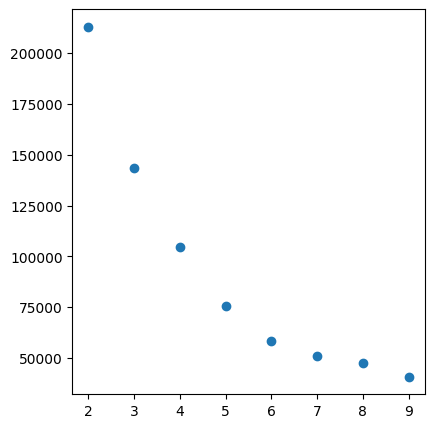

In [21]:
scores = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  scores.append( -kmeans.score(X) )
  
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot([k for k in range(2,10)], scores, 'o')
#After n_cluster=5, the score is not decreasing significantly. So, we choose n_cluster=5.
n_clusters=5
#The data in the variable X are clustered using k-means by the code. This is accomplished by first compiling a list of k-means models with various cluster densities (ranging from 2 to 10), fitting each model to the data, and then calculating each model's score using the score method. Then, we plot these results. The fit predict method, which both fits the model to the data and returns the cluster labels for each data point, is used to fit the final k-means model to the data, with the number of clusters set to 5. The y_pred variable contains these labels. 
y_pred = KMeans(n_clusters=n_clusters).fit_predict(X)

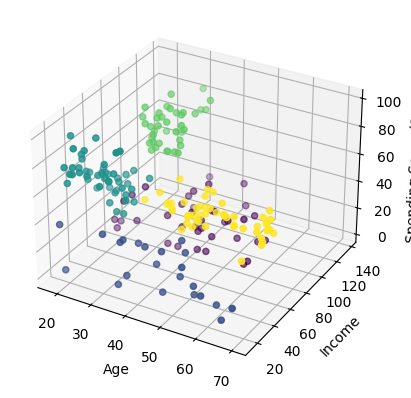

In [22]:
#reference: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points(Age, Income, Spending Score)
ax.scatter3D(X[:,0],X[:, 1], X[:, 2],c=y_pred);
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending Score (1-100)')
plt.show()
#The first column of the data in the variable X's data is used as the x-axis, the second column as the y-axis, and the third column as the z-axis. Each point's color on the scatter plot is determined by its associated y pred value. The labels for the x, y, and z axes are "Age," "Income," and "Spending Score (1-100)," respectively.